In [17]:
import yfinance as yf
import requests
import pandas as pd
import pickle 


In [18]:
def list_wikipedia_nasdaq100() -> pd.DataFrame:
    # Ref: https://stackoverflow.com/a/75846060/
    url = 'https://en.m.wikipedia.org/wiki/Nasdaq-100'
    return pd.read_html(url, attrs={'id': "constituents"}, index_col='Ticker')[0]

index_wiki = list_wikipedia_nasdaq100()

symbols = index_wiki.index.to_list()


In [19]:
big = yf.Tickers(symbols)


def list_ticker() -> pd.DataFrame:
    # Ref: https://stackoverflow.com/a/75846060/
    url = "https://finance.yahoo.com/world-indices/"
    html = requests.get(url).content
    return pd.read_html(html)

index_list = list_ticker()

In [20]:
major_indices  = list(index_list[0]["Symbol"])[:20]

In [21]:
dict_tickers = {i:big.tickers[i].history(period = "60mo") for i in symbols}

In [ ]:
# event_tickers_1 = {i:big.tickers[i].earnings_dates for i in symbols[:10]}

In [ ]:
split_data = event_tickers_1.copy()
for sym in symbols[:10]:
    stock_price = dict_tickers[sym]
    earnings_data = event_tickers_1[sym]
    split = list(range(30))
    for i in range(1,30):
        a = earnings_data.index[i]
        b = earnings_data.index[i-1]
        split[i] = stock_price[stock_price.index < a]
        split[i] = stock_price[stock_price.index > b]
    split_data.update({sym : split})


In [23]:
dict_tickers["AAPL"]["Open"]

Date
2019-05-22 00:00:00-04:00     44.553714
2019-05-23 00:00:00-04:00     43.381114
2019-05-24 00:00:00-04:00     43.477629
2019-05-28 00:00:00-04:00     43.168811
2019-05-29 00:00:00-04:00     42.565612
                                ...    
2024-05-15 00:00:00-04:00    187.910004
2024-05-16 00:00:00-04:00    190.470001
2024-05-17 00:00:00-04:00    189.509995
2024-05-20 00:00:00-04:00    189.330002
2024-05-21 00:00:00-04:00    191.089996
Name: Open, Length: 1259, dtype: float64

In [24]:
big_index = yf.Tickers(major_indices)

dict_index = {i:big_index.tickers[i].history(period = "60mo") for i in major_indices}

In [ ]:

with open('saved_symbols.pkl', 'wb') as f:
    pickle.dump(symbols, f)
with open('saved_indexes.pkl', 'wb') as f:
    pickle.dump(major_indices, f)
with open('ticker_history.pkl', 'wb') as f:
    pickle.dump(dict_tickers, f)
with open('index_history.pkl', 'wb') as f:
    pickle.dump(dict_index, f)


{'^GSPC':                                   Open         High          Low        Close  \
 Date                                                                            
 2019-05-22 00:00:00-04:00  2856.060059  2865.469971  2851.110107  2856.270020   
 2019-05-23 00:00:00-04:00  2836.699951  2836.699951  2805.489990  2822.239990   
 2019-05-24 00:00:00-04:00  2832.409912  2841.360107  2820.189941  2826.060059   
 2019-05-28 00:00:00-04:00  2830.030029  2840.510010  2801.580078  2802.389893   
 2019-05-29 00:00:00-04:00  2790.250000  2792.030029  2766.060059  2783.020020   
 ...                                ...          ...          ...          ...   
 2024-05-15 00:00:00-04:00  5263.259766  5311.759766  5263.259766  5308.149902   
 2024-05-16 00:00:00-04:00  5310.069824  5325.490234  5296.189941  5297.100098   
 2024-05-17 00:00:00-04:00  5303.100098  5305.450195  5283.589844  5303.270020   
 2024-05-20 00:00:00-04:00  5305.350098  5325.319824  5302.399902  5308.129883   
 2024-0

In [33]:
joined = dict_tickers.copy()
for sym in symbols:
    a = pd.DataFrame(dict_tickers[sym]["Open"])
    for ind in major_indices:
        a[ind] =  dict_index[ind]["Open"]
    joined.update({sym: a})


In [53]:
joined["AAPL"]

Open        ^GSPC          ^DJI  \
Date                                                               
2019-05-22 00:00:00-04:00   44.553714  2856.060059  25818.460938   
2019-05-23 00:00:00-04:00   43.381114  2836.699951  25657.990234   
2019-05-24 00:00:00-04:00   43.477629  2832.409912  25551.070312   
2019-05-28 00:00:00-04:00   43.168811  2830.030029  25616.550781   
2019-05-29 00:00:00-04:00   42.565612  2790.250000  25231.460938   
...                               ...          ...           ...   
2024-05-15 00:00:00-04:00  187.910004  5263.259766  39615.101562   
2024-05-16 00:00:00-04:00  190.470001  5310.069824  39912.339844   
2024-05-17 00:00:00-04:00  189.509995  5303.100098  39911.718750   
2024-05-20 00:00:00-04:00  189.330002  5305.350098  39989.761719   
2024-05-21 00:00:00-04:00  191.089996  5298.689941  39804.398438   

                                  ^IXIC          ^NYA         ^XAX  ^BUK100P  \
Date                                                                           
2019-05-22 00:00:00-04:00   7749.799805  12682.519531  2553.479980       NaN   
2019-05-23 00:00:00-04:00   7660.720215  12569.339844  2521.959961       NaN   
2019-05-24 00:00:00-04:00   7675.569824  12595.540039  2499.010010       NaN   
2019-05-28 00:00:00-04:00   7655.660156  12597.709961  2485.629883       NaN   
2019-05-29 00:00:00-04:00   7553.020020  12398.240234  2444.270020       NaN   
...                                 ...           ...          ...       ...   
2024-05-15 00:00:00-04:00  16601.140625  18220.810547  4868.169922       NaN   
2024-05-16 00:00:00-04:00  16738.109375  18378.490234  4897.580078       NaN   
2024-05-17 00:00:00-04:00  16708.490234  18317.380859  4908.450195       NaN   
2024-05-20 00:00:00-04:00  16702.019531  18388.259766  4971.180176       NaN   
2024-05-21 00:00:00-04:00  16736.099609  18335.619141  4973.729980       NaN   

                                  ^RUT  ^VIX  ^FTSE  ...  ^FCHI  ^STOXX50E  \
Date                                                 ...                     
2019-05-22 00:00:00-04:00  1542.579956   NaN    NaN  ...    NaN        NaN   
2019-05-23 00:00:00-04:00  1525.069946   NaN    NaN  ...    NaN        NaN   
2019-05-24 00:00:00-04:00  1505.880005   NaN    NaN  ...    NaN        NaN   
2019-05-28 00:00:00-04:00  1514.989990   NaN    NaN  ...    NaN        NaN   
2019-05-29 00:00:00-04:00  1503.530029   NaN    NaN  ...    NaN        NaN   
...                                ...   ...    ...  ...    ...        ...   
2024-05-15 00:00:00-04:00  2105.419922   NaN    NaN  ...    NaN        NaN   
2024-05-16 00:00:00-04:00  2107.090088   NaN    NaN  ...    NaN        NaN   
2024-05-17 00:00:00-04:00  2103.669922   NaN    NaN  ...    NaN        NaN   
2024-05-20 00:00:00-04:00  2096.489990   NaN    NaN  ...    NaN        NaN   
2024-05-21 00:00:00-04:00  2097.469971   NaN    NaN  ...    NaN        NaN   

                           ^N100  ^BFX  IMOEX.ME  ^N225  ^HSI  000001.SS  \
Date                                                                       
2019-05-22 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2019-05-23 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2019-05-24 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2019-05-28 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2019-05-29 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
...                          ...   ...       ...    ...   ...        ...   
2024-05-15 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2024-05-16 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2024-05-17 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2024-05-20 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   
2024-05-21 00:00:00-04:00    NaN   NaN       NaN    NaN   NaN        NaN   

                           399001.SZ  ^STI  
Date                                        
2019-05-22 00

In [64]:
american_correlation = joined.copy()
for sym in symbols:
    a = joined[sym].iloc[:, : 5]
    b = a.corr()
    american_correlation.update({sym: b})

In [66]:
american_correlation["AAPL"]

Open     ^GSPC      ^DJI     ^IXIC      ^NYA
Open   1.000000  0.913515  0.871917  0.859449  0.803964
^GSPC  0.913515  1.000000  0.981420  0.952176  0.956150
^DJI   0.871917  0.981420  1.000000  0.906839  0.980721
^IXIC  0.859449  0.952176  0.906839  1.000000  0.894257
^NYA   0.803964  0.956150  0.980721  0.894257  1.000000

In [68]:
change = joined.copy()
def set_init(a):
    return a*100/a[0]

from sklearn.preprocessing import MaxAbsScaler
for sym in symbols:
    easy_plot = set_init(joined[sym].iloc[:, : 5].values)
    change.update({sym: pd.DataFrame(easy_plot)})
change["AAPL"]

0           1           2           3           4
0     100.000000  100.000000  100.000000  100.000000  100.000000
1      97.368122   99.322139   99.378465   98.850556   99.107593
2      97.584747   99.171931   98.964343   99.042169   99.314178
3      96.891611   99.088604   99.217962   98.785263   99.331288
4      95.537743   97.695775   97.726433   97.460840   97.758495
...          ...         ...         ...         ...         ...
1254  421.760586  184.283932  153.437115  214.213800  143.668697
1255  427.506454  185.922905  154.588377  215.981184  144.911981
1256  425.351737  185.678872  154.585972  215.598992  144.430141
1257  424.947746  185.757652  154.888248  215.515497  144.989012
1258  428.898022  185.524458  154.170299  215.955251  144.573948

[1259 rows x 5 columns]

c:\Users\tmath\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


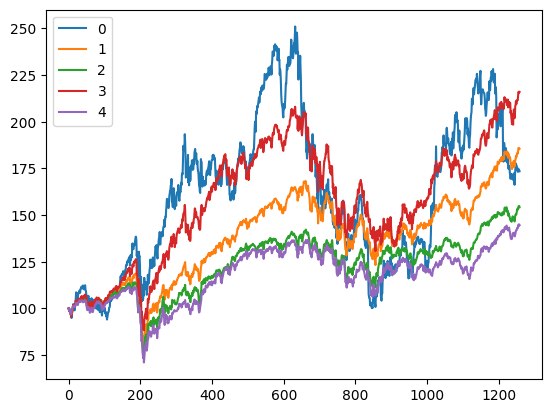

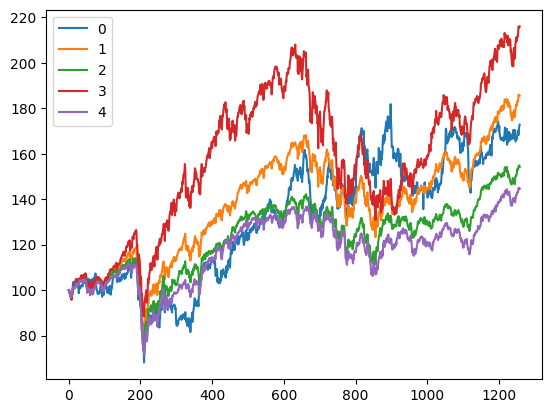

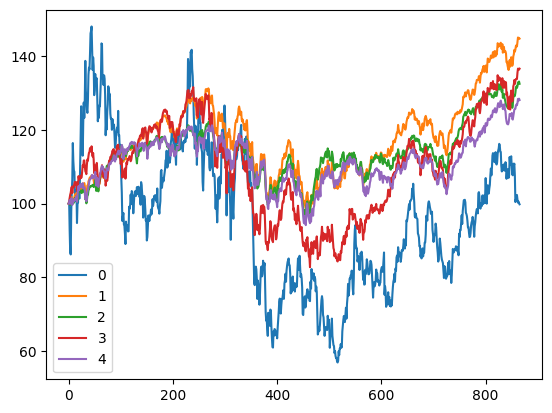

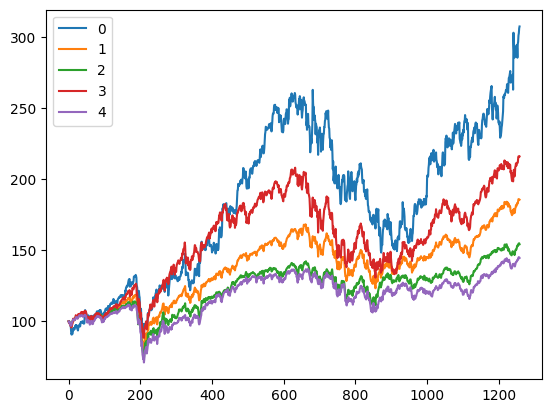

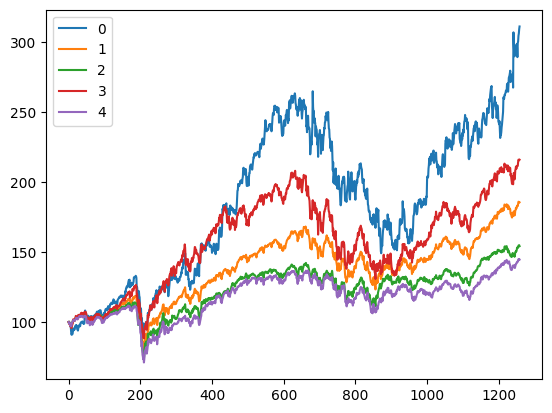

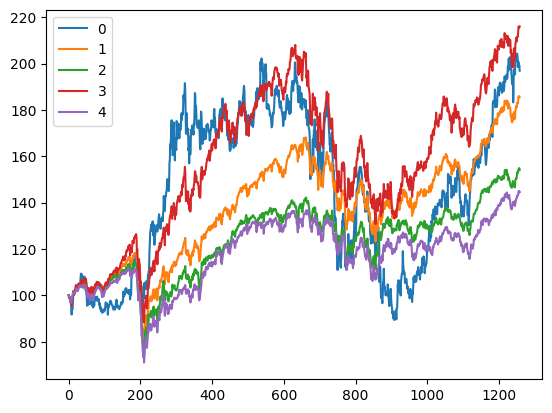

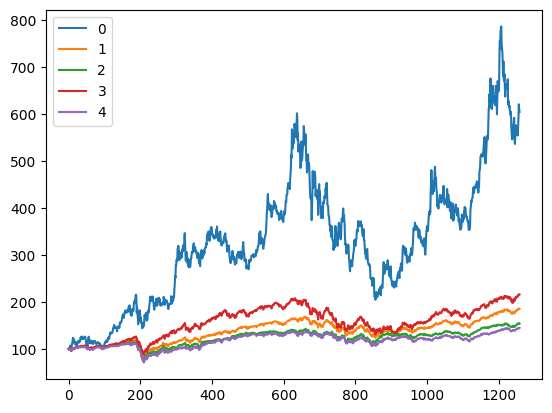

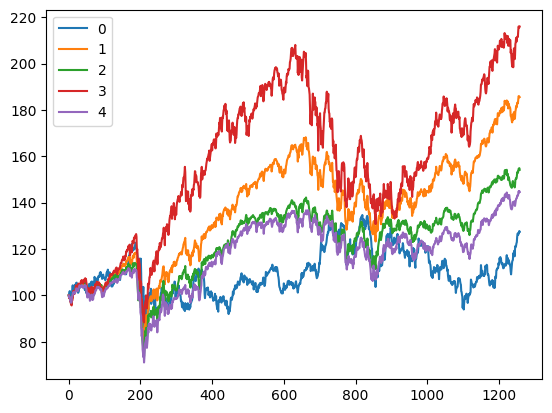

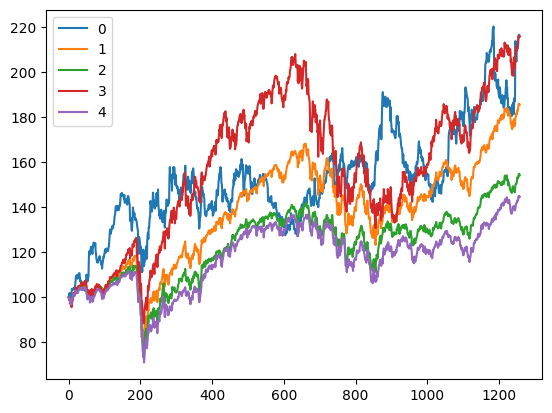

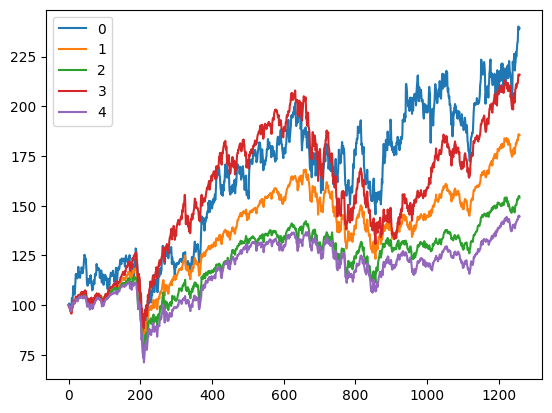

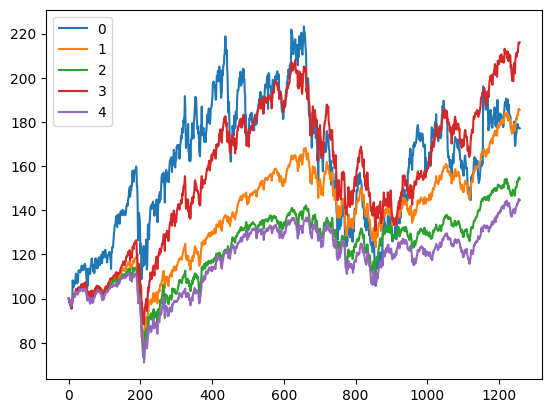

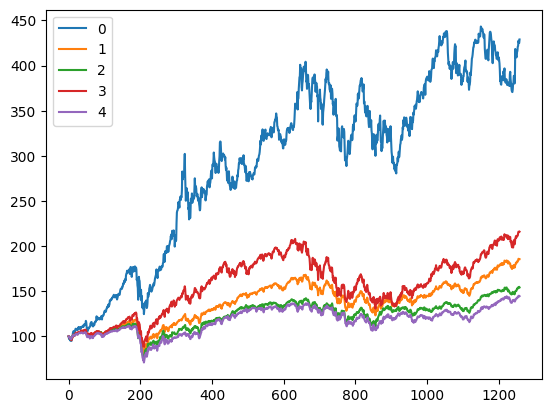

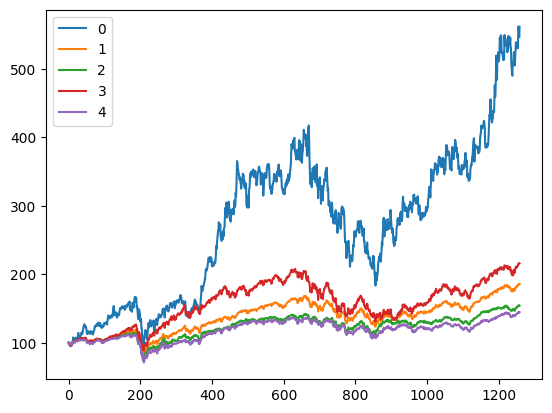

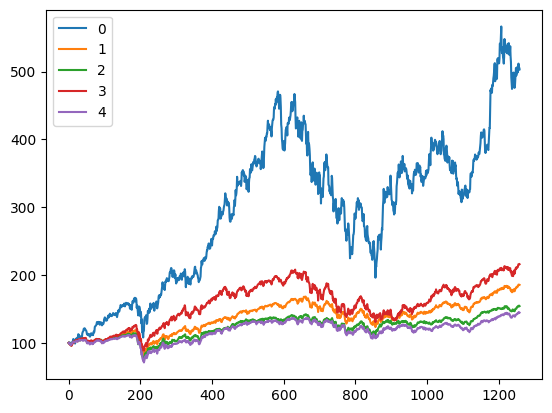

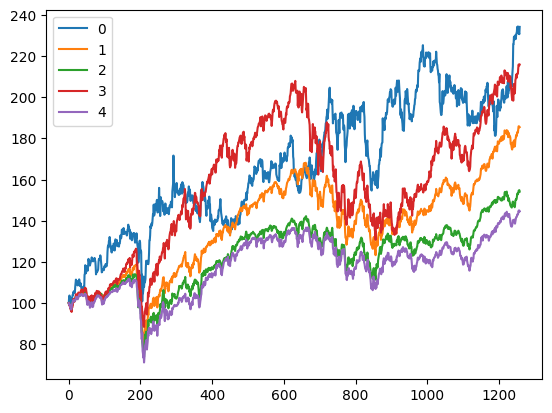

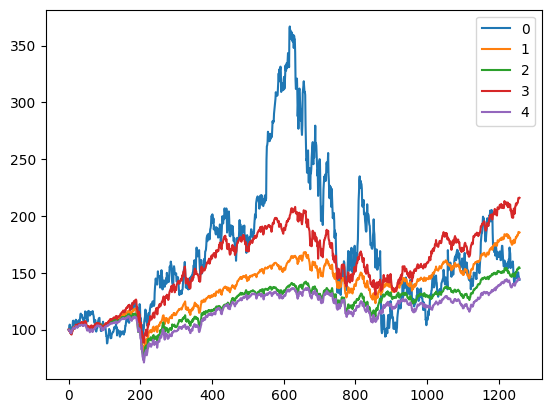

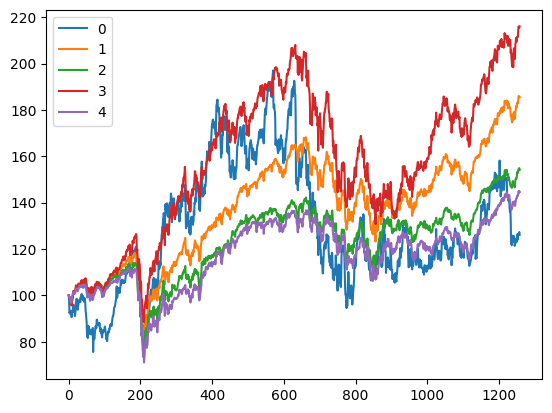

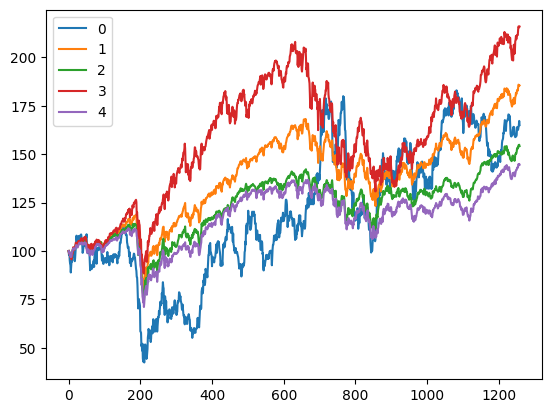

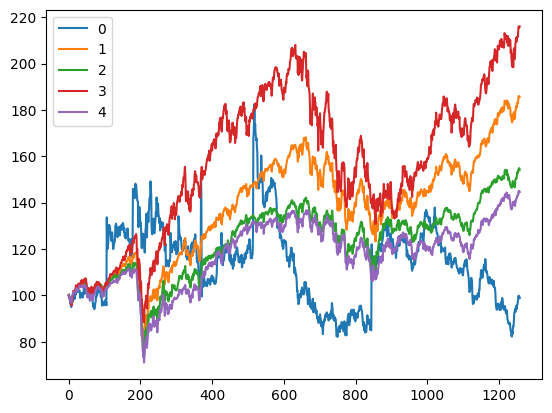

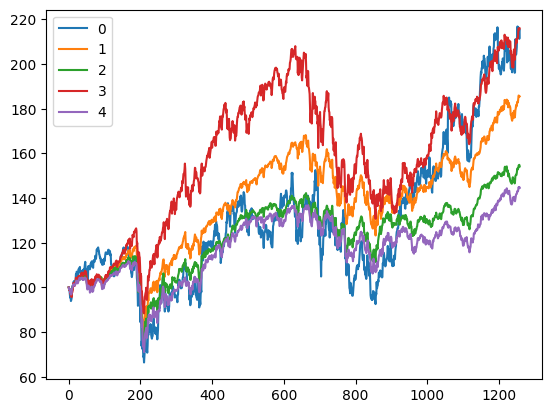

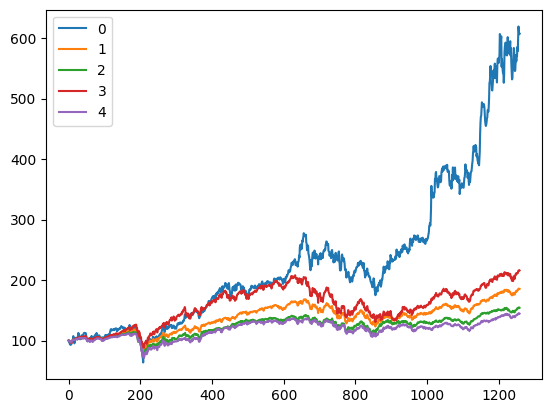

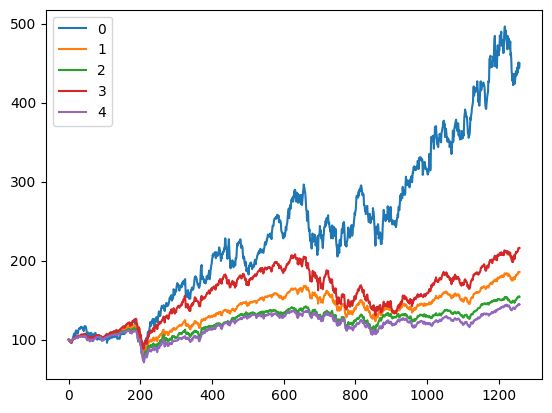

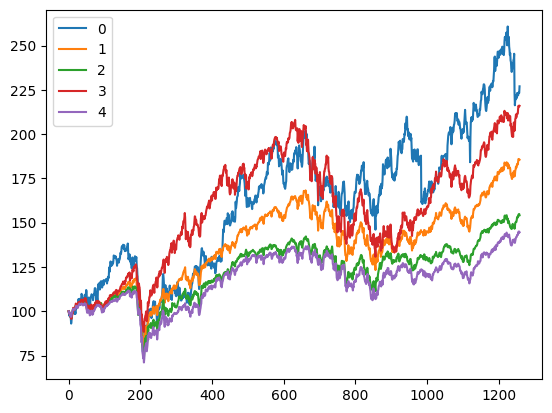

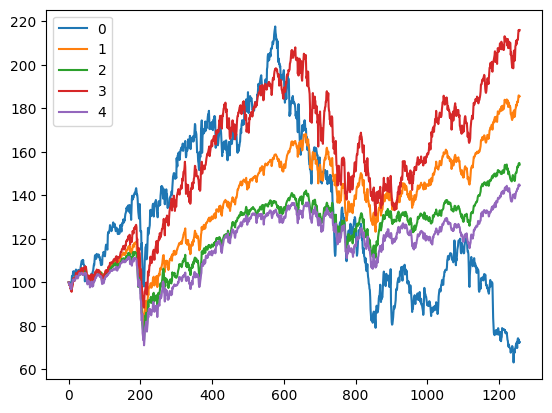

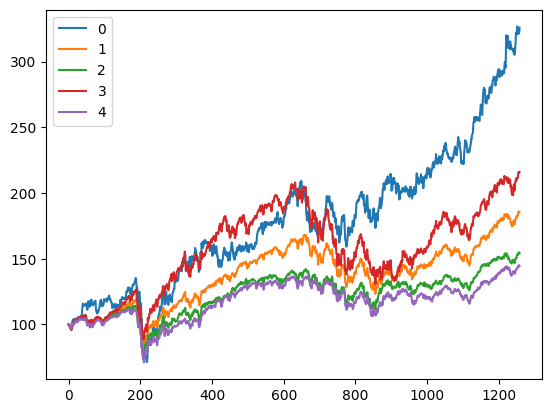

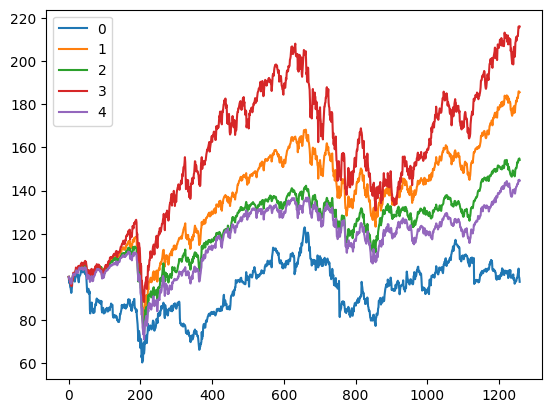

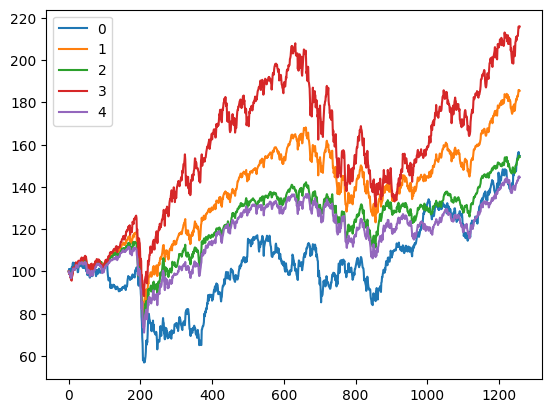

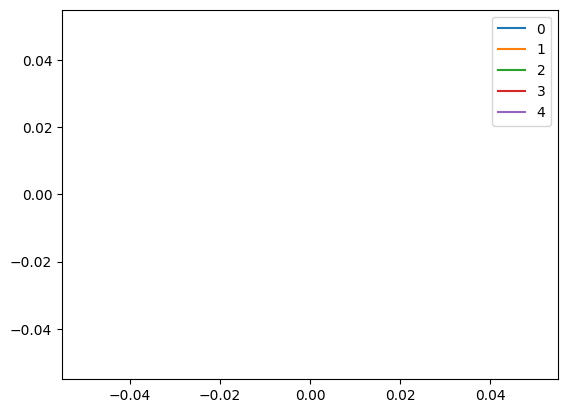

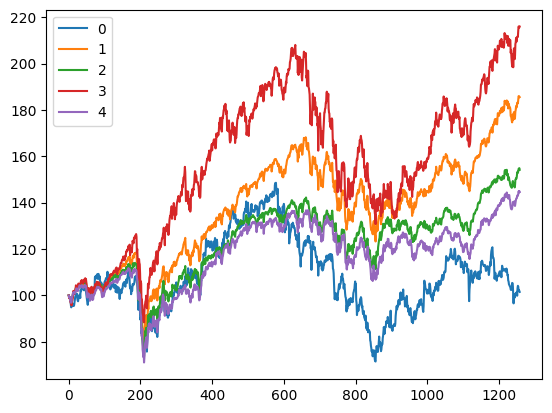

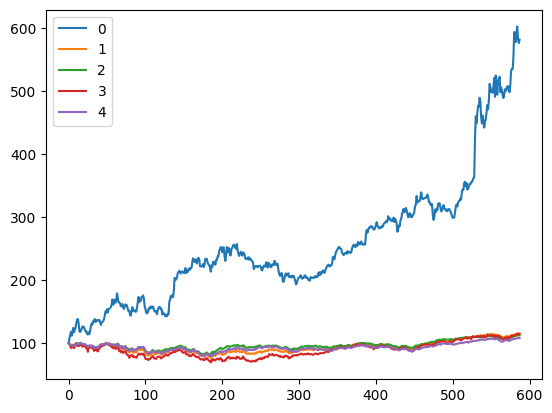

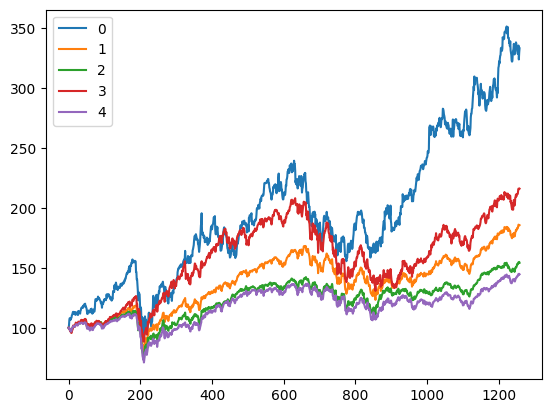

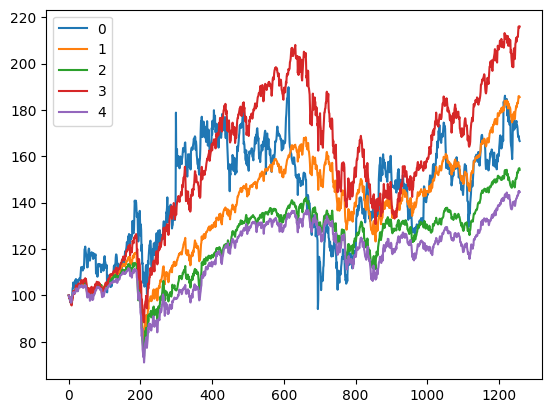

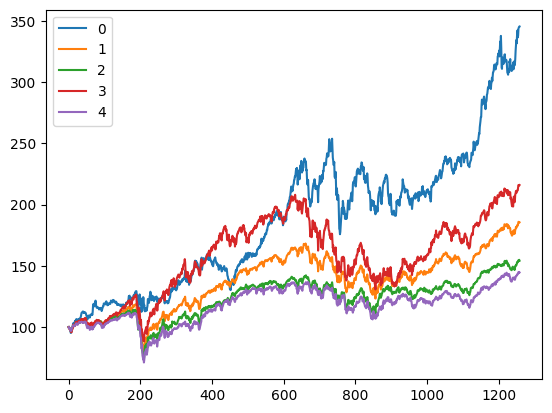

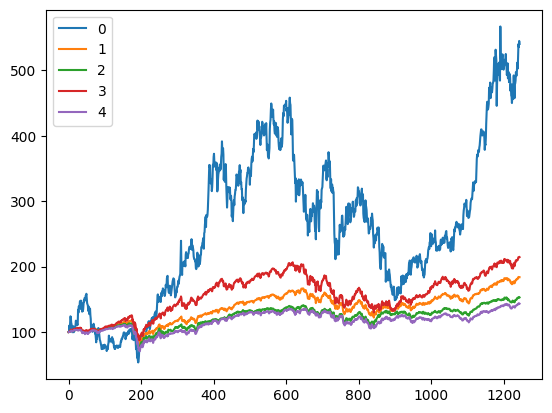

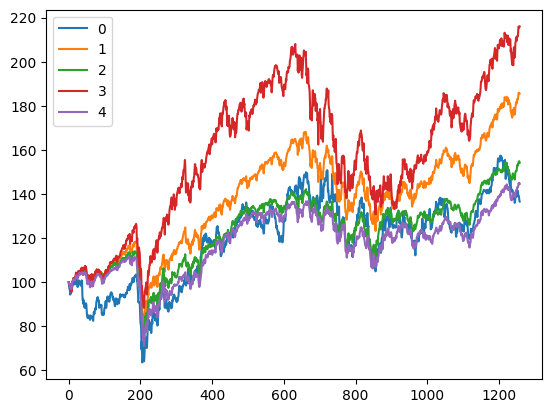

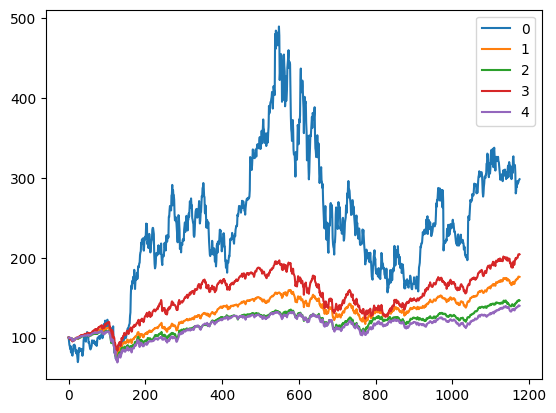

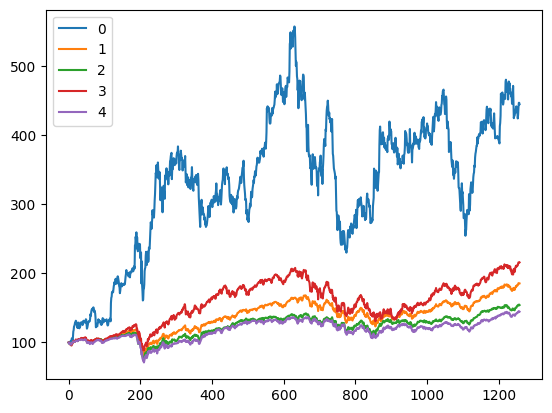

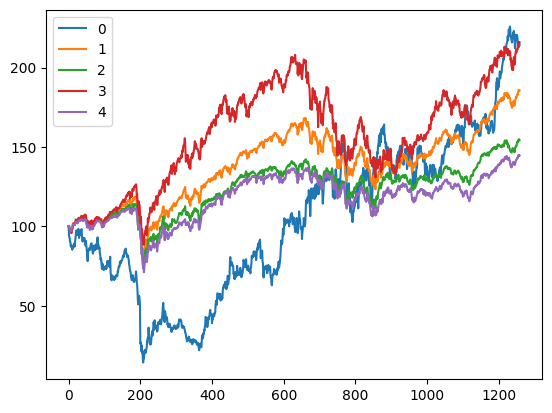

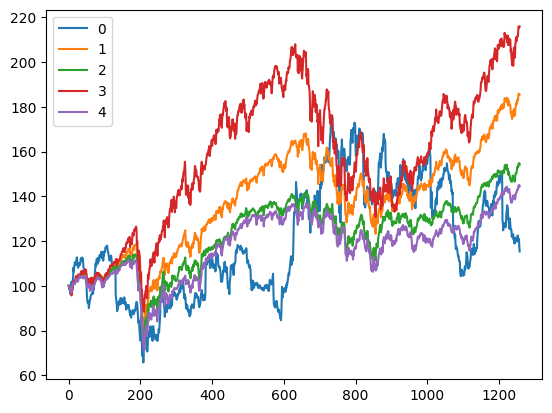

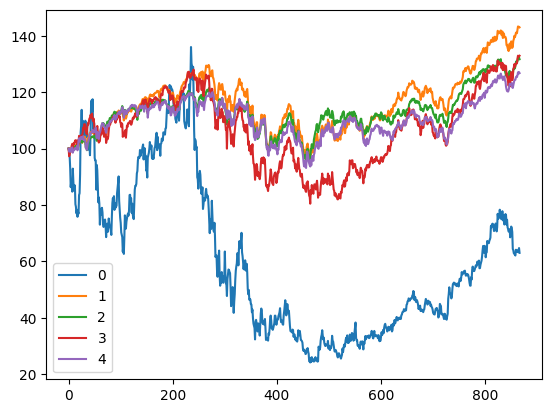

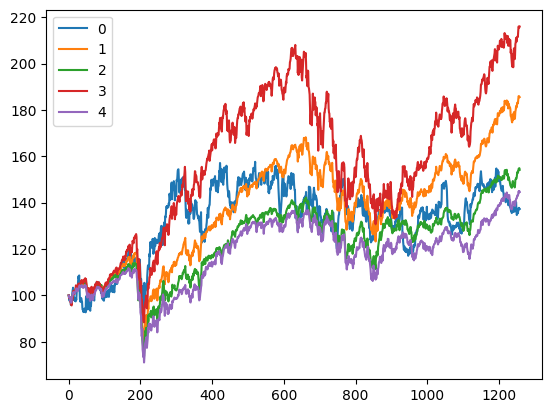

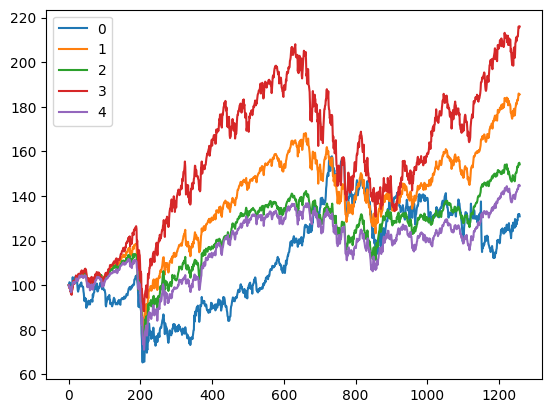

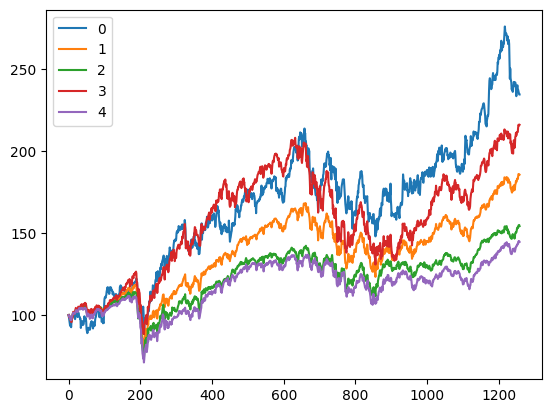

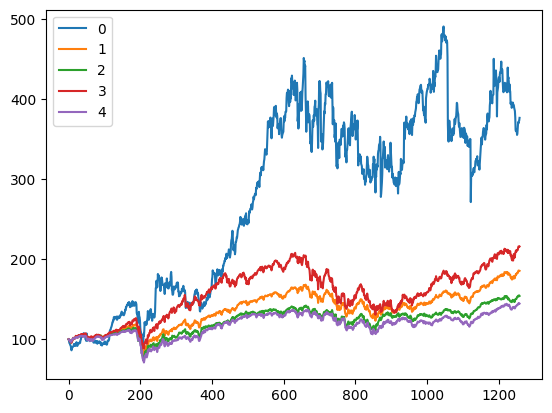

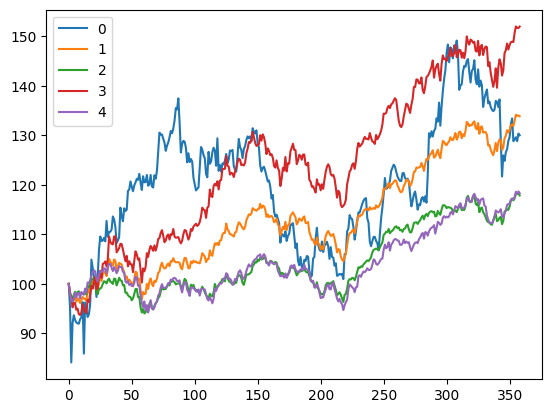

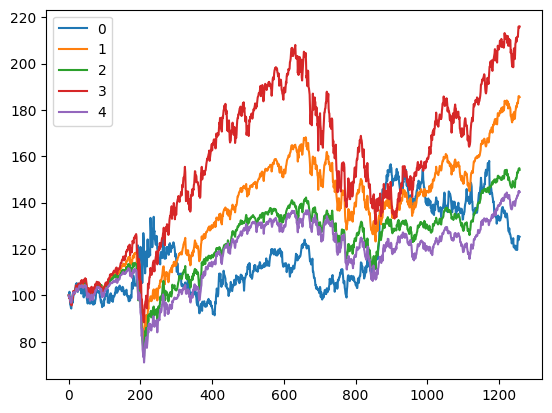

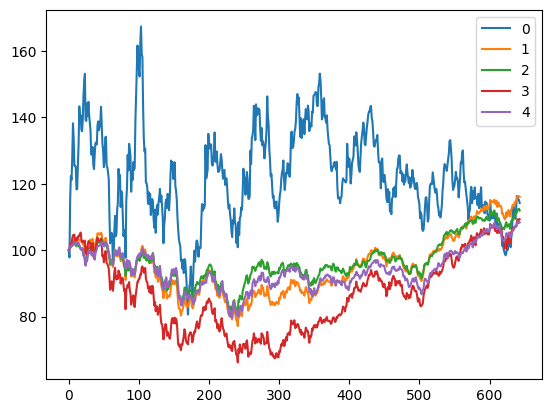

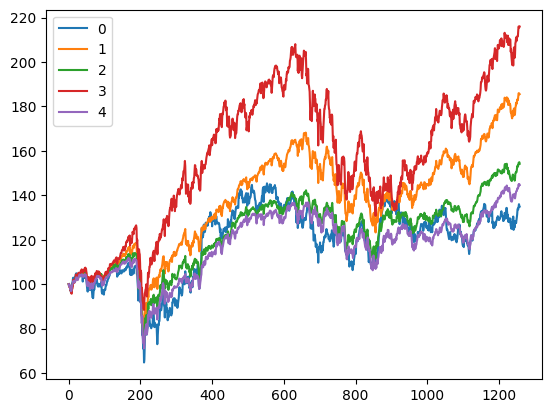

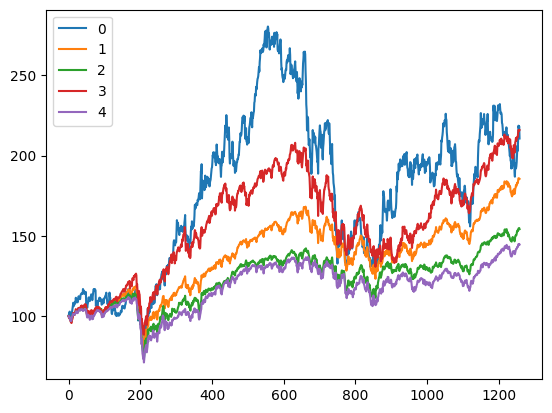

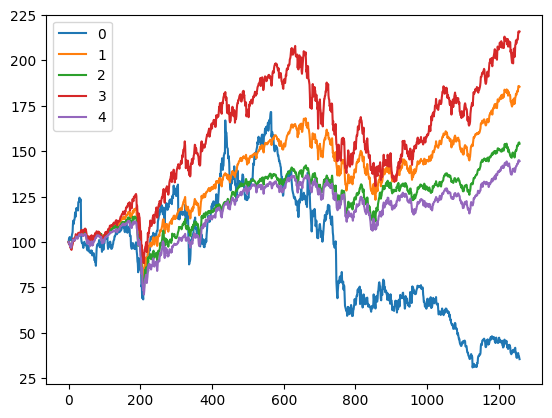

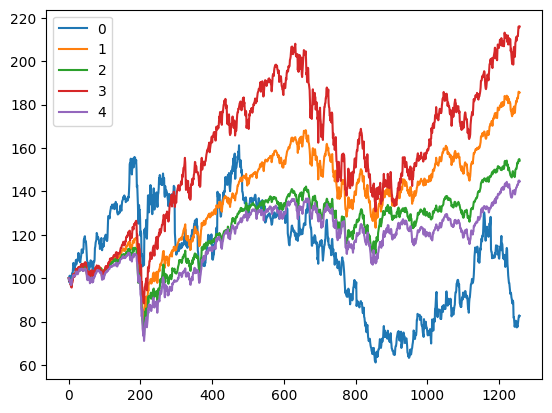

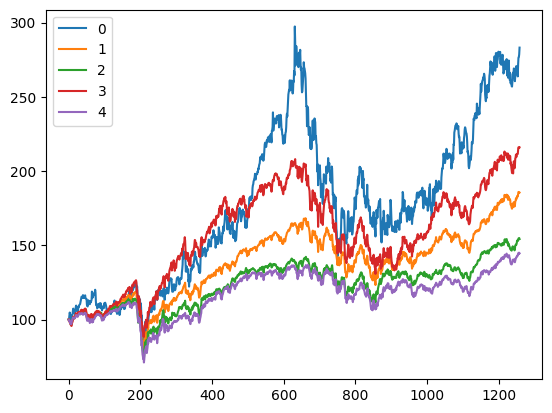

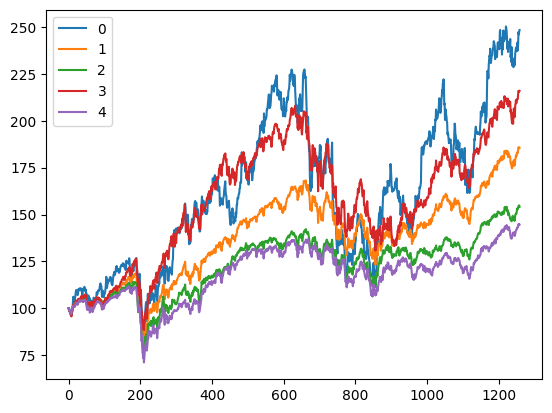

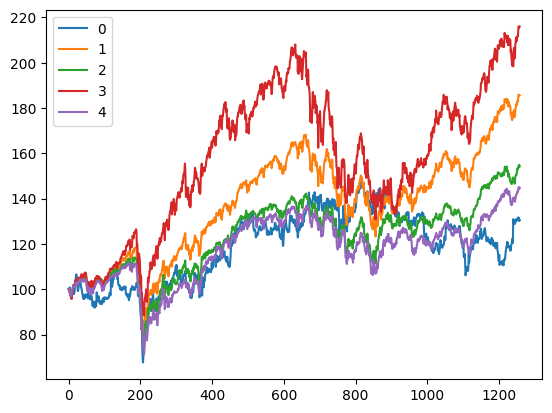

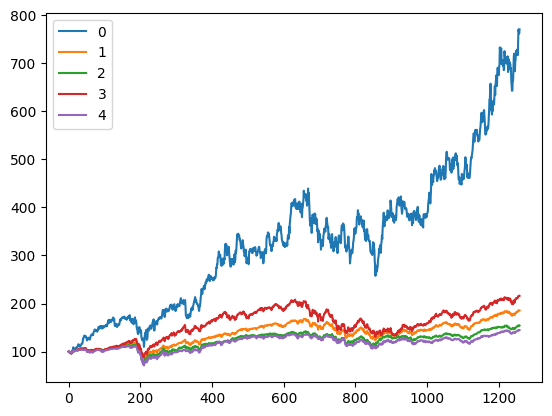

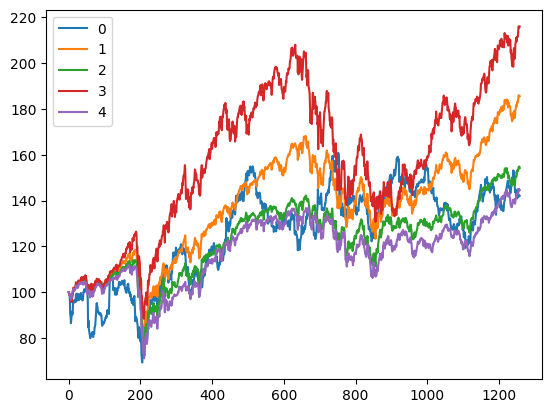

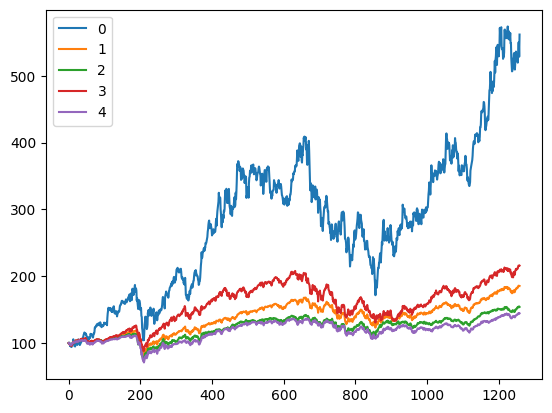

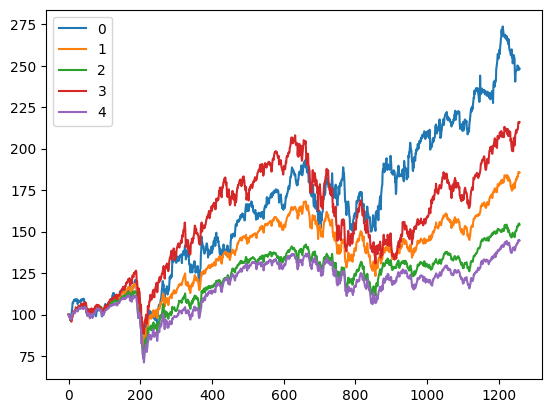

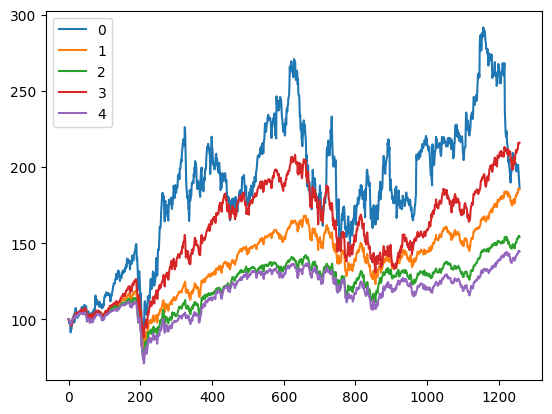

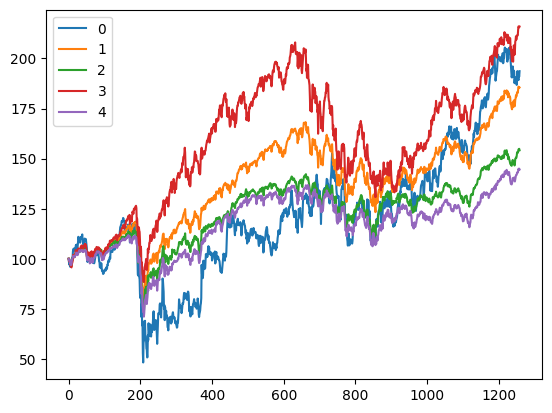

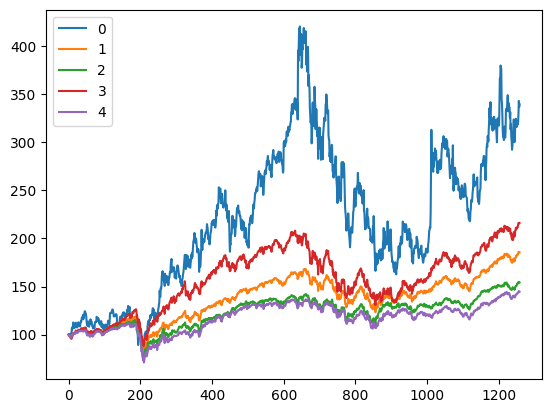

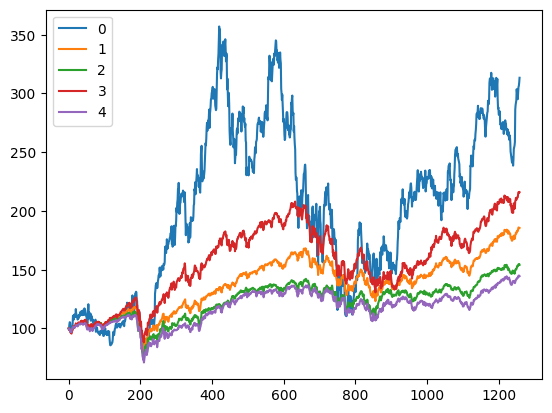

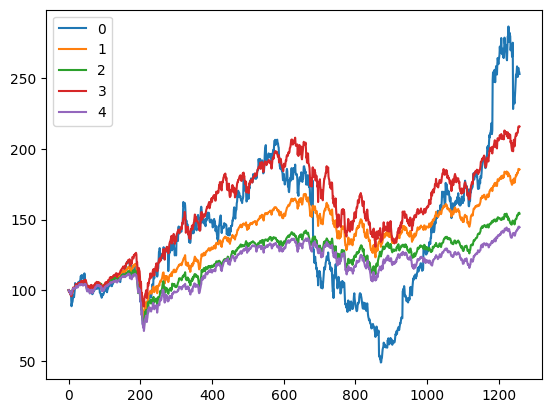

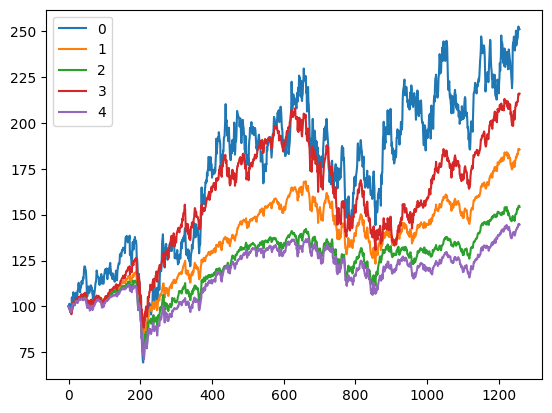

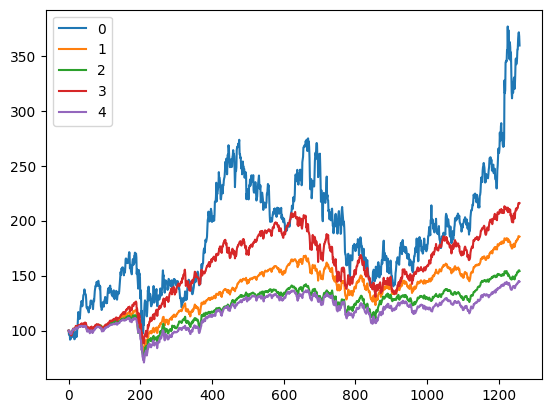

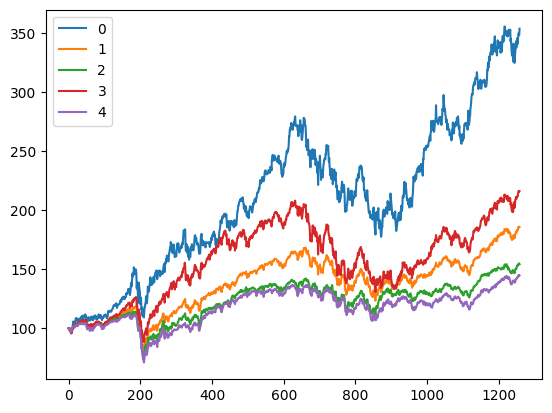

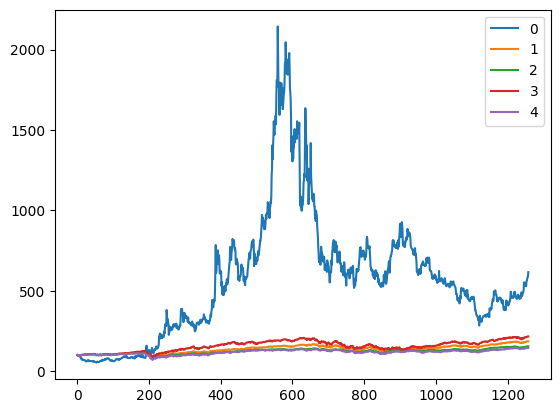

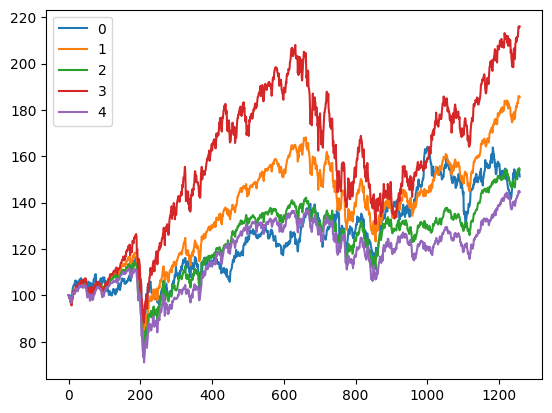

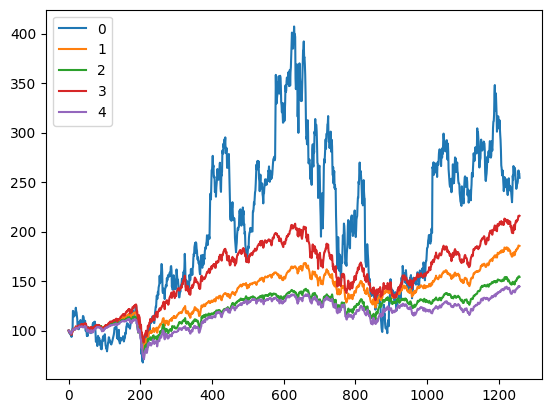

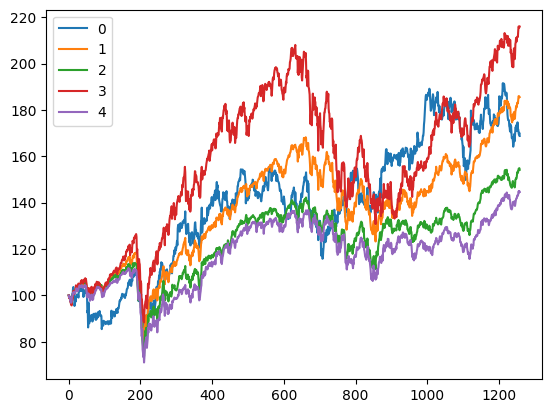

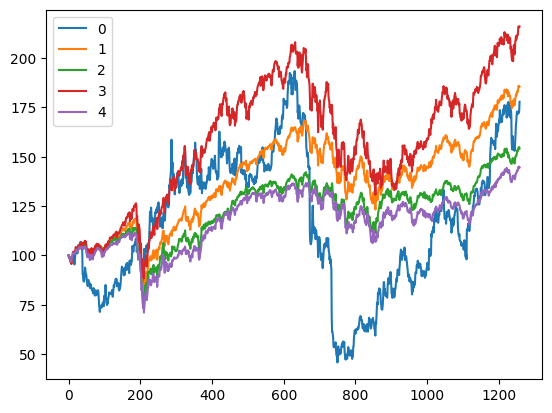

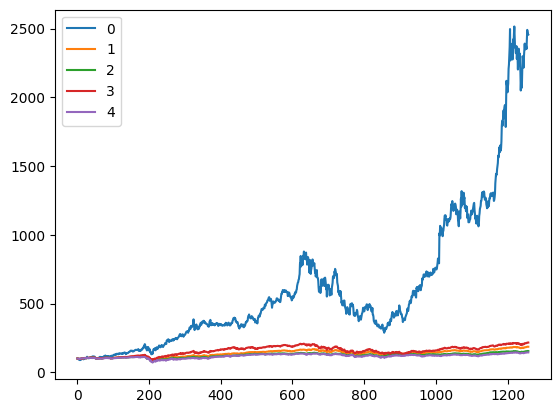

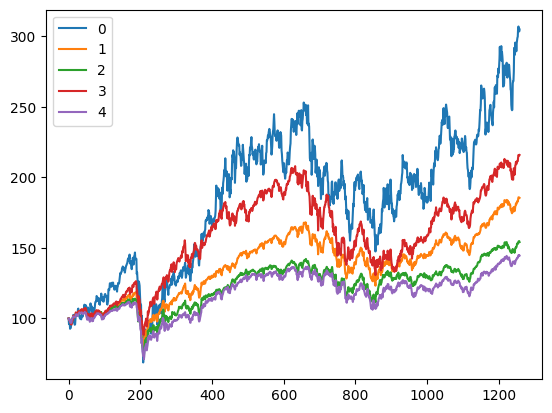

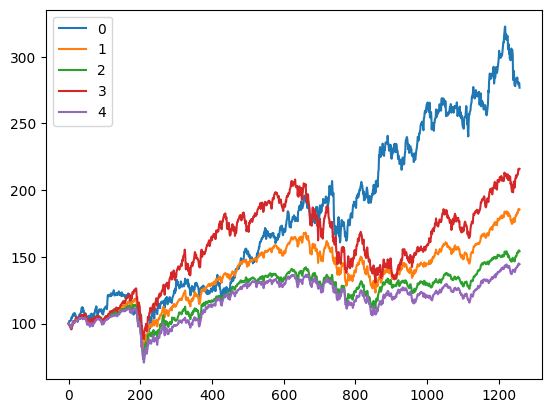

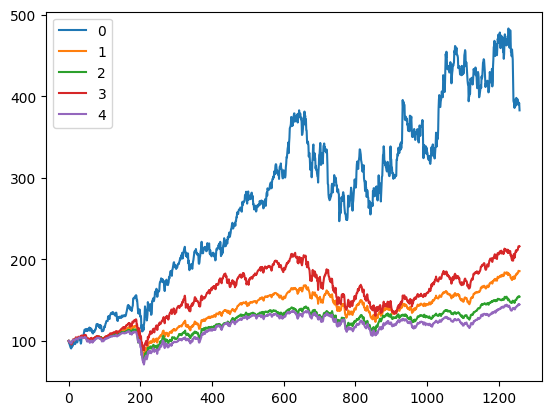

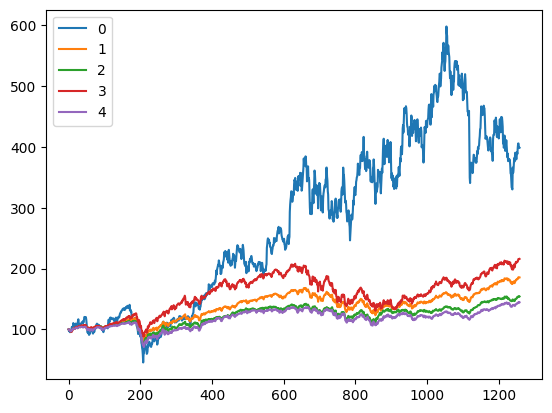

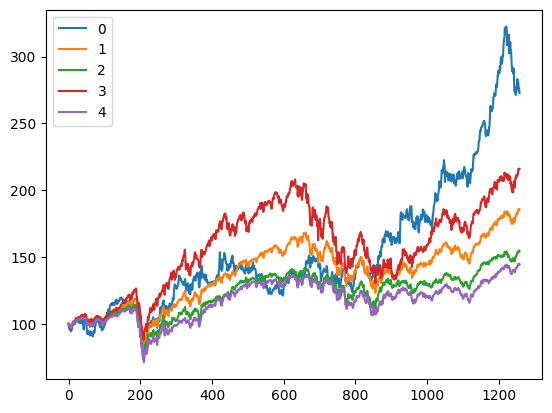

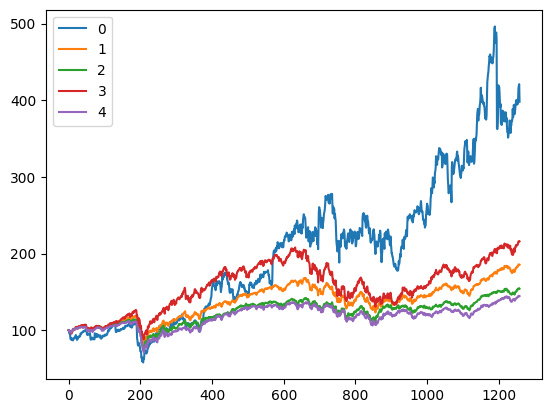

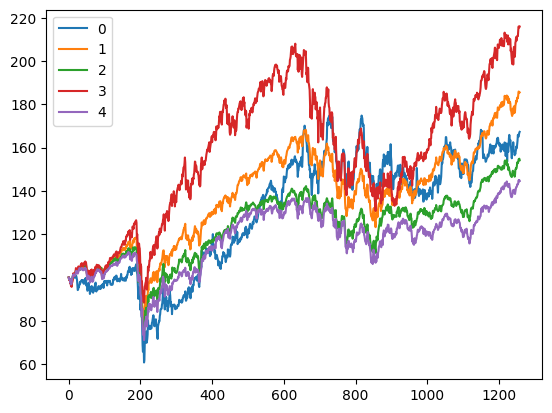

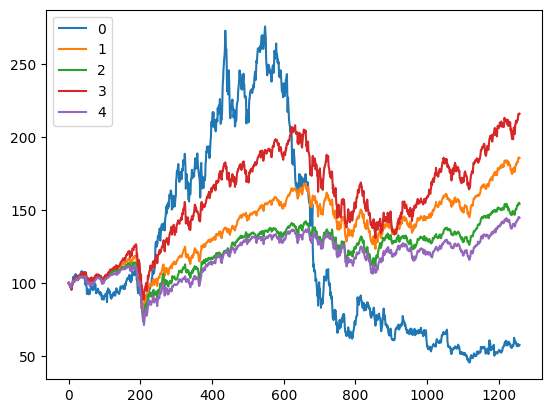

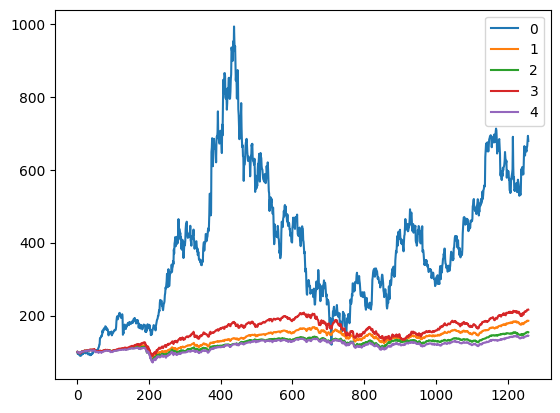

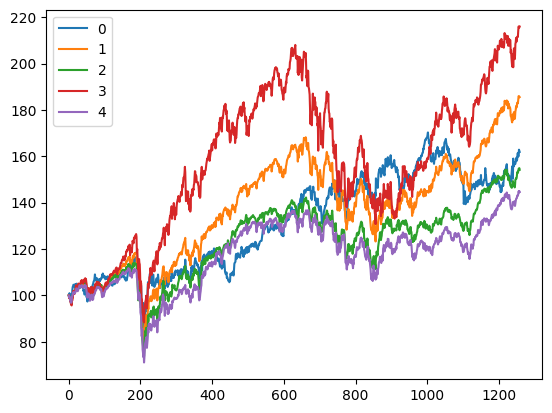

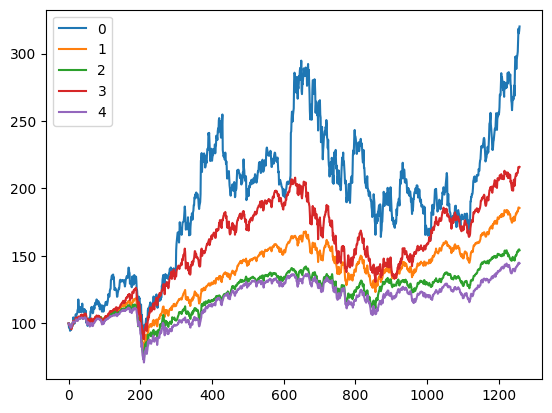

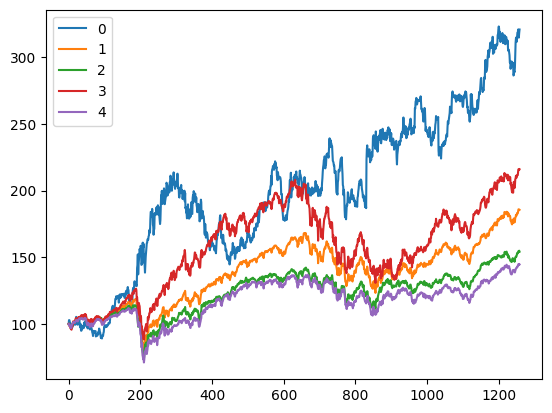

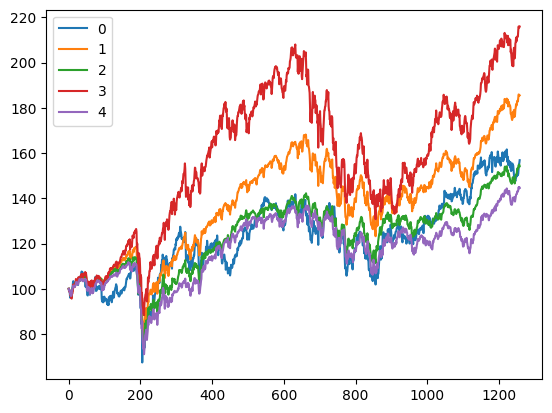

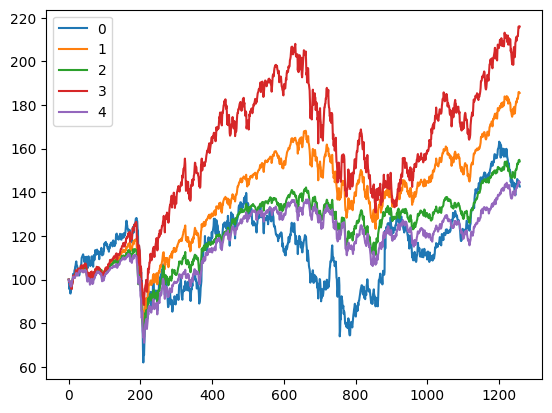

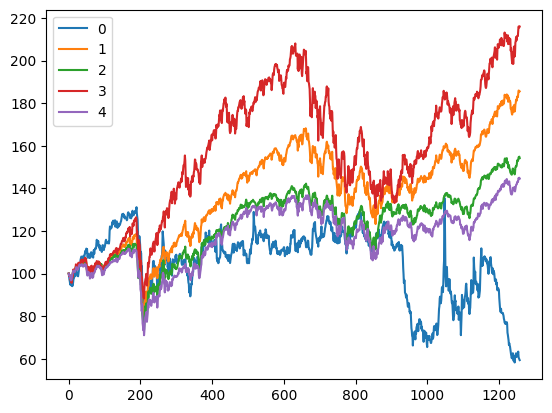

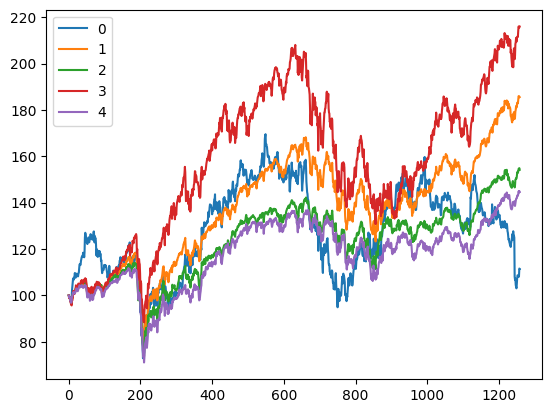

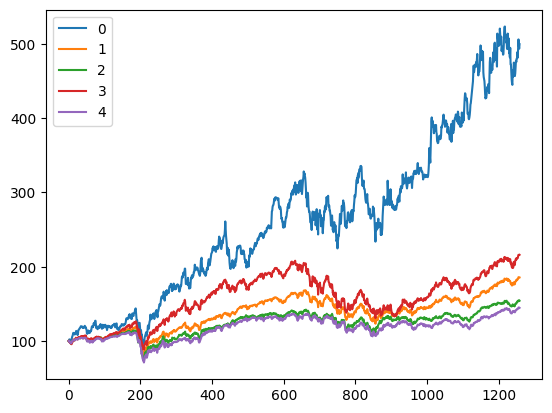

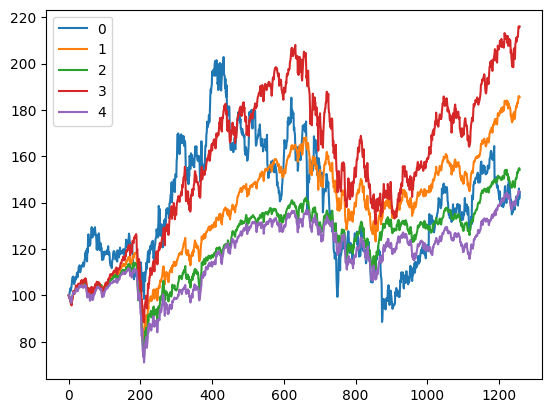

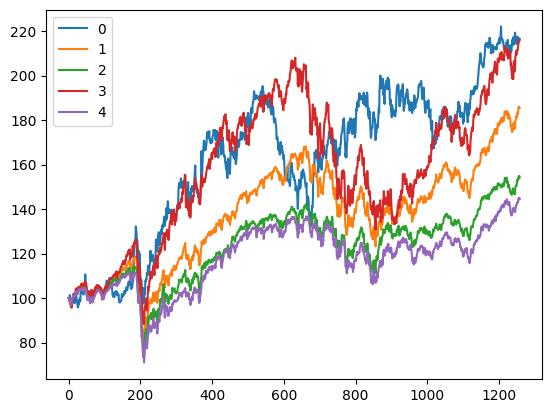

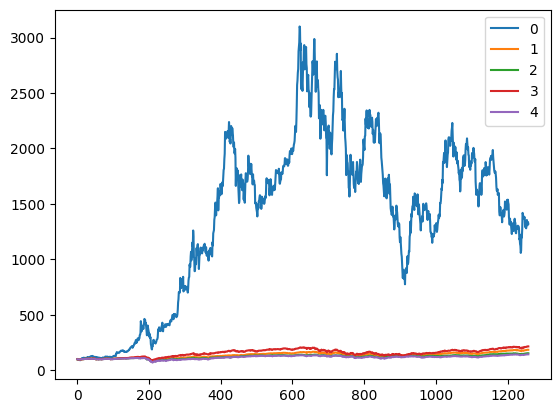

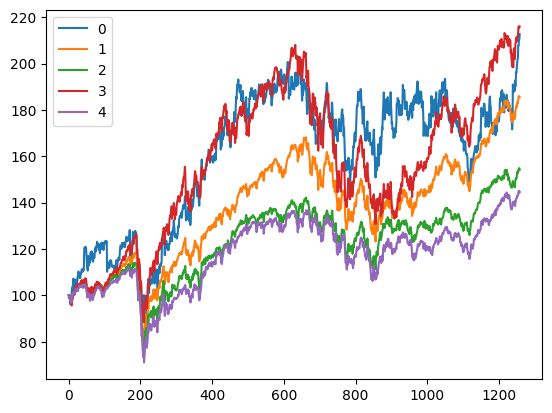

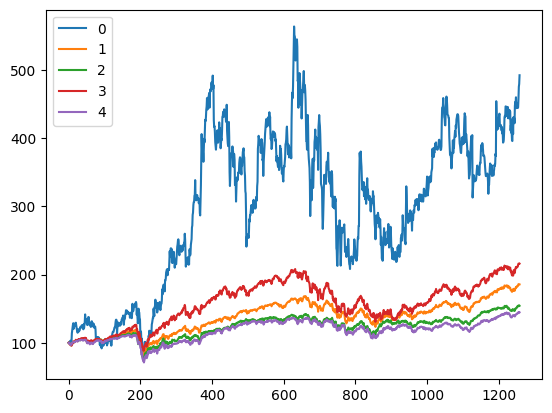

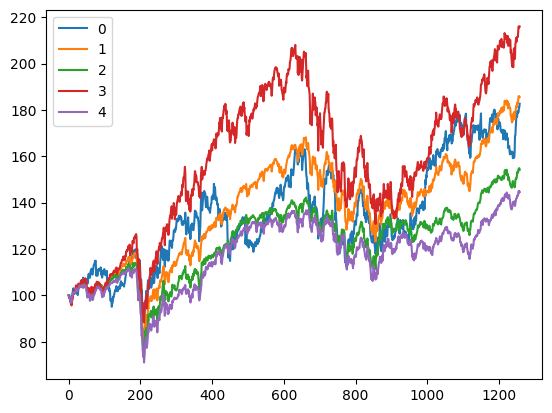

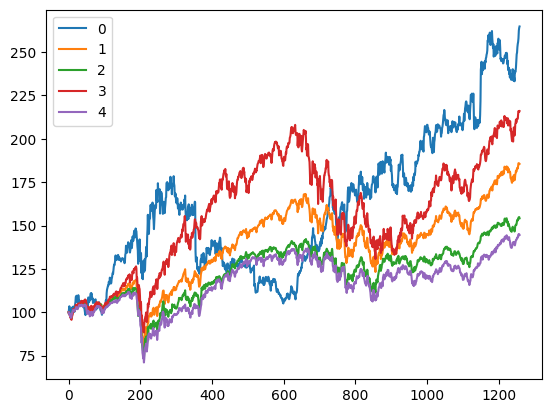

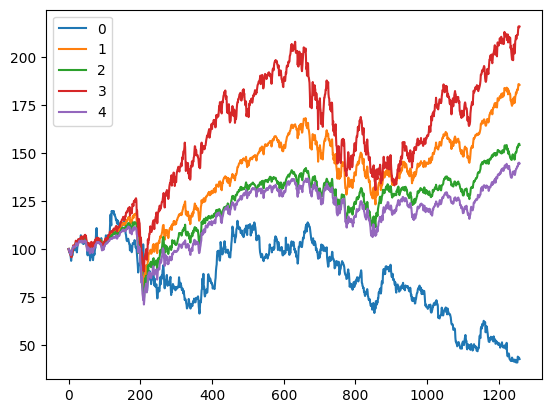

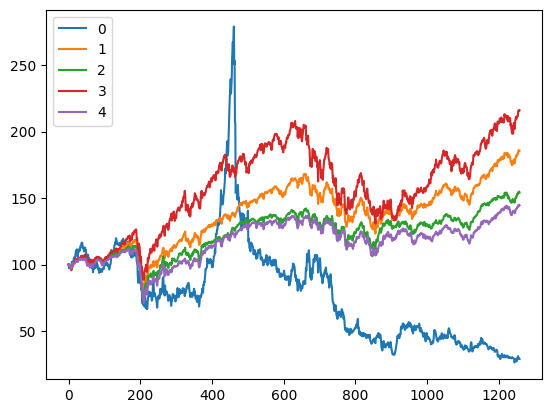

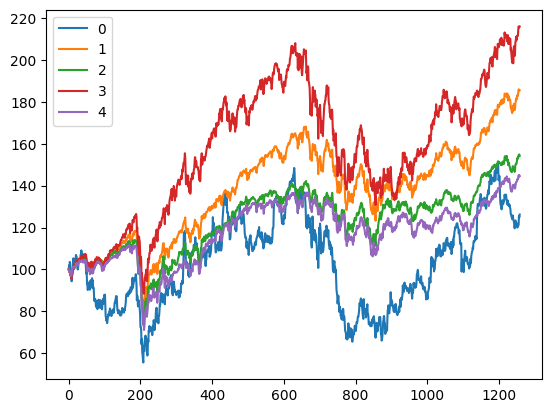

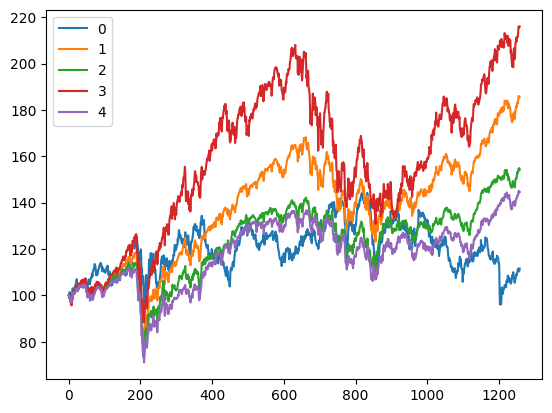

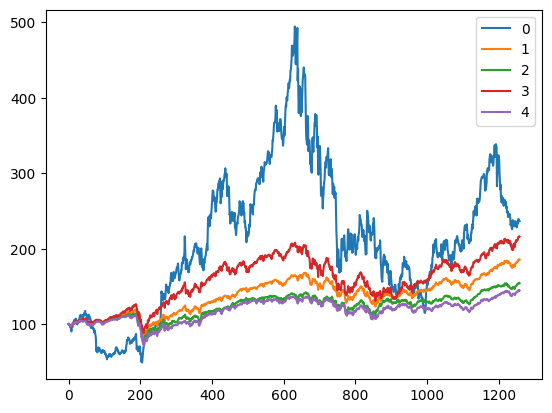

In [69]:
import matplotlib.pyplot as plt
for i in symbols:
    change[i].plot()

In [ ]:
from stockdex import TickerFactory
from datetime import datetime

ticker = TickerFactory(ticker="AAPL", data_source="yahoo_web").ticker
financials = ticker.financials(period1=datetime(2022, 1, 1), period2=datetime.today())
type(ticker)

AttributeError: 'Ticker' object has no attribute 'financials'